###Μηχανική Μάθηση
####1η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

 `⚠️  Το σύνολο δεδομένων που σας δόθηκε δεν πρέπει να εμπλουτισθεί με οποιοδήποτε τρόπο. Η εργασία στην οποία θα χρησιμοποιηθεί εμπλουτισμένο σύνολο δεδομένων, δεν θα διορθωθεί.`

Ονοματεπώνυμο φοιτητή: Καμπουγέρης Χαράλαμπος

Α.Μ.: 03120098

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1_ndkaT6BoDuxxPPxLWq-oKDJqzO1Dlhg/view?usp=sharing) .


1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [4]:
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/My Drive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

train_val = pd.read_csv(folder_path + 'train-val.csv')

# Display the first few rows of the dataset for verification
train_val.head()

,id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,2009-03-04,Albury,13.8,22.1,0.2,NaN,NaN,WNW,57.0,...,57.0,26.0,1014.5,1013.1,NaN,NaN,15.6,21.9,0.0,0.0
1,2,2009-03-05,Albury,11.5,22.0,0.0,NaN,NaN,SW,50.0,...,60.0,33.0,1013.7,1011.8,NaN,NaN,13.9,21.4,0.0,0.0
2,3,2009-03-09,Albury,13.8,31.8,0.0,NaN,NaN,NNE,24.0,...,49.0,28.0,1019.7,1015.9,NaN,NaN,18.6,30.5,0.0,0.0
3,4,2009-03-10,Albury,15.5,32.0,0.0,NaN,NaN,NE,50.0,...,51.0,25.0,1019.5,1016.2,NaN,NaN,20.1,30.8,0.0,1.0
4,5,2009-03-11,Albury,18.4,30.5,1.2,NaN,NaN,NE,44.0,...,57.0,23.0,1021.3,1018.0,NaN,NaN,21.5,29.6,1.0,0.0


1.β. Φορτώστε το σύνολο δεδομένων "test.csv" στο notebook σας

In [7]:
test = pd.read_csv(folder_path+ 'test-2.csv')

# Display the first few rows of the dataset for verification
test.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,22/03/2009,Albury,14.6,30.0,0.0,NaN,NaN,NE,37.0,E,...,19.0,56.0,30.0,1014.8,1012.7,3.0,1.0,18.1,29.0,0
1,15/04/2009,Albury,10.7,21.9,0.0,NaN,NaN,W,63.0,NW,...,31.0,44.0,27.0,1008.2,1009.8,2.0,NaN,20.5,18.9,0
2,21/04/2009,Albury,5.7,21.4,0.0,NaN,NaN,ESE,17.0,ENE,...,7.0,68.0,39.0,1025.2,1020.9,NaN,NaN,12.2,20.9,0
3,24/04/2009,Albury,10.6,16.2,0.0,NaN,NaN,WNW,39.0,ESE,...,4.0,74.0,86.0,1008.9,1002.4,8.0,8.0,14.9,15.1,0
4,19/05/2009,Albury,3.7,19.1,0.0,NaN,NaN,SSE,19.0,NaN,...,11.0,87.0,51.0,1023.6,1019.9,NaN,NaN,7.4,18.9,0


### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων,

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών,

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [4]:
# 2a Display the number of samples and characteristics of the train-val dataset

num_samples, num_features = train_val.shape
print(train_val.shape)
print(f"The number of samples: {num_samples}")
print(f"The number of features: {num_features}")

(48423, 24)
The number of samples: 48423
The number of features: 24


 The DataFrame.shape attribute in Pandas enables us to obtain the shape of a DataFrame.

In [5]:
# 2b Display the data types of each column in the train-val dataset
data_types = train_val.dtypes
data_types

id                 int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object

 Use dtypes to check the data types of each column in the DataFrame

In [6]:
# 2c Display the  labels of  of the train-val dataset
attribute_labes = train_val.columns
attribute_labes

Index(['id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
# 2d Display the number of categories in each categorical column of the train-val dataset
categorical_columns = train_val.select_dtypes(include='object').columns
num_categories = train_val[categorical_columns].nunique()
num_categories

# two classes of raintomor


Date           2534
Location         49
WindGustDir      16
WindDir9am       16
WindDir3pm       16
dtype: int64

In [8]:
# 2e Display the count of each category in categorical columns of the train-val dataset
category_counts = train_val[categorical_columns].apply(lambda col: col.value_counts())
category_counts

,Date,Location,WindGustDir,WindDir9am,WindDir3pm
2007-11-03,1.0,NaN,NaN,NaN,NaN
2007-11-04,1.0,NaN,NaN,NaN,NaN
2007-11-06,1.0,NaN,NaN,NaN,NaN
2007-11-07,1.0,NaN,NaN,NaN,NaN
2007-11-08,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
Watsonia,NaN,1021.0,NaN,NaN,NaN
Williamtown,NaN,821.0,NaN,NaN,NaN
Witchcliffe,NaN,1004.0,NaN,NaN,NaN
Wollongong,NaN,1034.0,NaN,NaN,NaN


In [9]:
# 2f Display the correlation between data of train-val dataset
correlation_matrix = train_val.corr()
correlation_matrix

<ipython-input-9-4b87c53f4a73>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_val.corr()


,id,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
id,1.000000,0.104771,0.136331,-0.024047,0.096221,0.078911,0.047488,0.062482,0.040819,-0.129400,-0.085483,-0.104157,-0.108251,-0.073085,-0.066481,0.139226,0.120342,-0.003840,-0.002691
MinTemp,0.104771,1.000000,0.715692,0.096510,0.457483,0.053477,0.163349,0.193476,0.183079,-0.232420,0.021193,-0.372295,-0.385832,0.071455,0.006876,0.892621,0.682041,0.065077,0.084001
MaxTemp,0.136331,0.715692,1.000000,-0.103864,0.586798,0.469859,0.013580,0.003229,0.054409,-0.485241,-0.504320,-0.224734,-0.331614,-0.304386,-0.305659,0.881130,0.984609,-0.247060,-0.177480
Rainfall,-0.024047,0.096510,-0.103864,1.000000,-0.069284,-0.210261,0.160382,0.102262,0.068231,0.217506,0.258283,-0.178761,-0.125762,0.202290,0.162473,-0.007844,-0.108617,0.527639,0.244867
Evaporation,0.096221,0.457483,0.586798,-0.069284,1.000000,0.351482,0.194751,0.208774,0.154487,-0.521304,-0.392778,-0.226294,-0.261228,-0.188185,-0.193911,0.556079,0.569842,-0.191368,-0.122146
Sunshine,0.078911,0.053477,0.469859,-0.210261,0.351482,1.000000,-0.051283,-0.001514,0.055941,-0.471021,-0.634892,0.078309,0.010106,-0.693561,-0.708928,0.286368,0.492766,-0.314345,-0.437883
WindGustSpeed,0.047488,0.163349,0.013580,0.160382,0.194751,-0.051283,1.000000,0.633542,0.715518,-0.214060,0.004057,-0.485376,-0.434426,0.086327,0.125622,0.123985,-0.024427,0.188300,0.258618
WindSpeed9am,0.062482,0.193476,0.003229,0.102262,0.208774,-0.001514,0.633542,1.000000,0.541097,-0.289202,-0.019900,-0.266217,-0.212422,0.035081,0.066148,0.141875,-0.008063,0.121898,0.118477
WindSpeed3pm,0.040819,0.183079,0.054409,0.068231,0.154487,0.055941,0.715518,0.541097,1.000000,-0.166434,-0.003281,-0.327326,-0.289712,0.048956,0.032267,0.169477,0.030884,0.097368,0.109116
Humidity9am,-0.129400,-0.232420,-0.485241,0.217506,-0.521304,-0.471021,-0.214060,-0.289202,-0.166434,1.000000,0.644709,0.117477,0.167571,0.439629,0.349397,-0.472335,-0.478217,0.332583,0.244048


### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας;


<ipython-input-10-8cdca5d8bd1f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_val.corr()


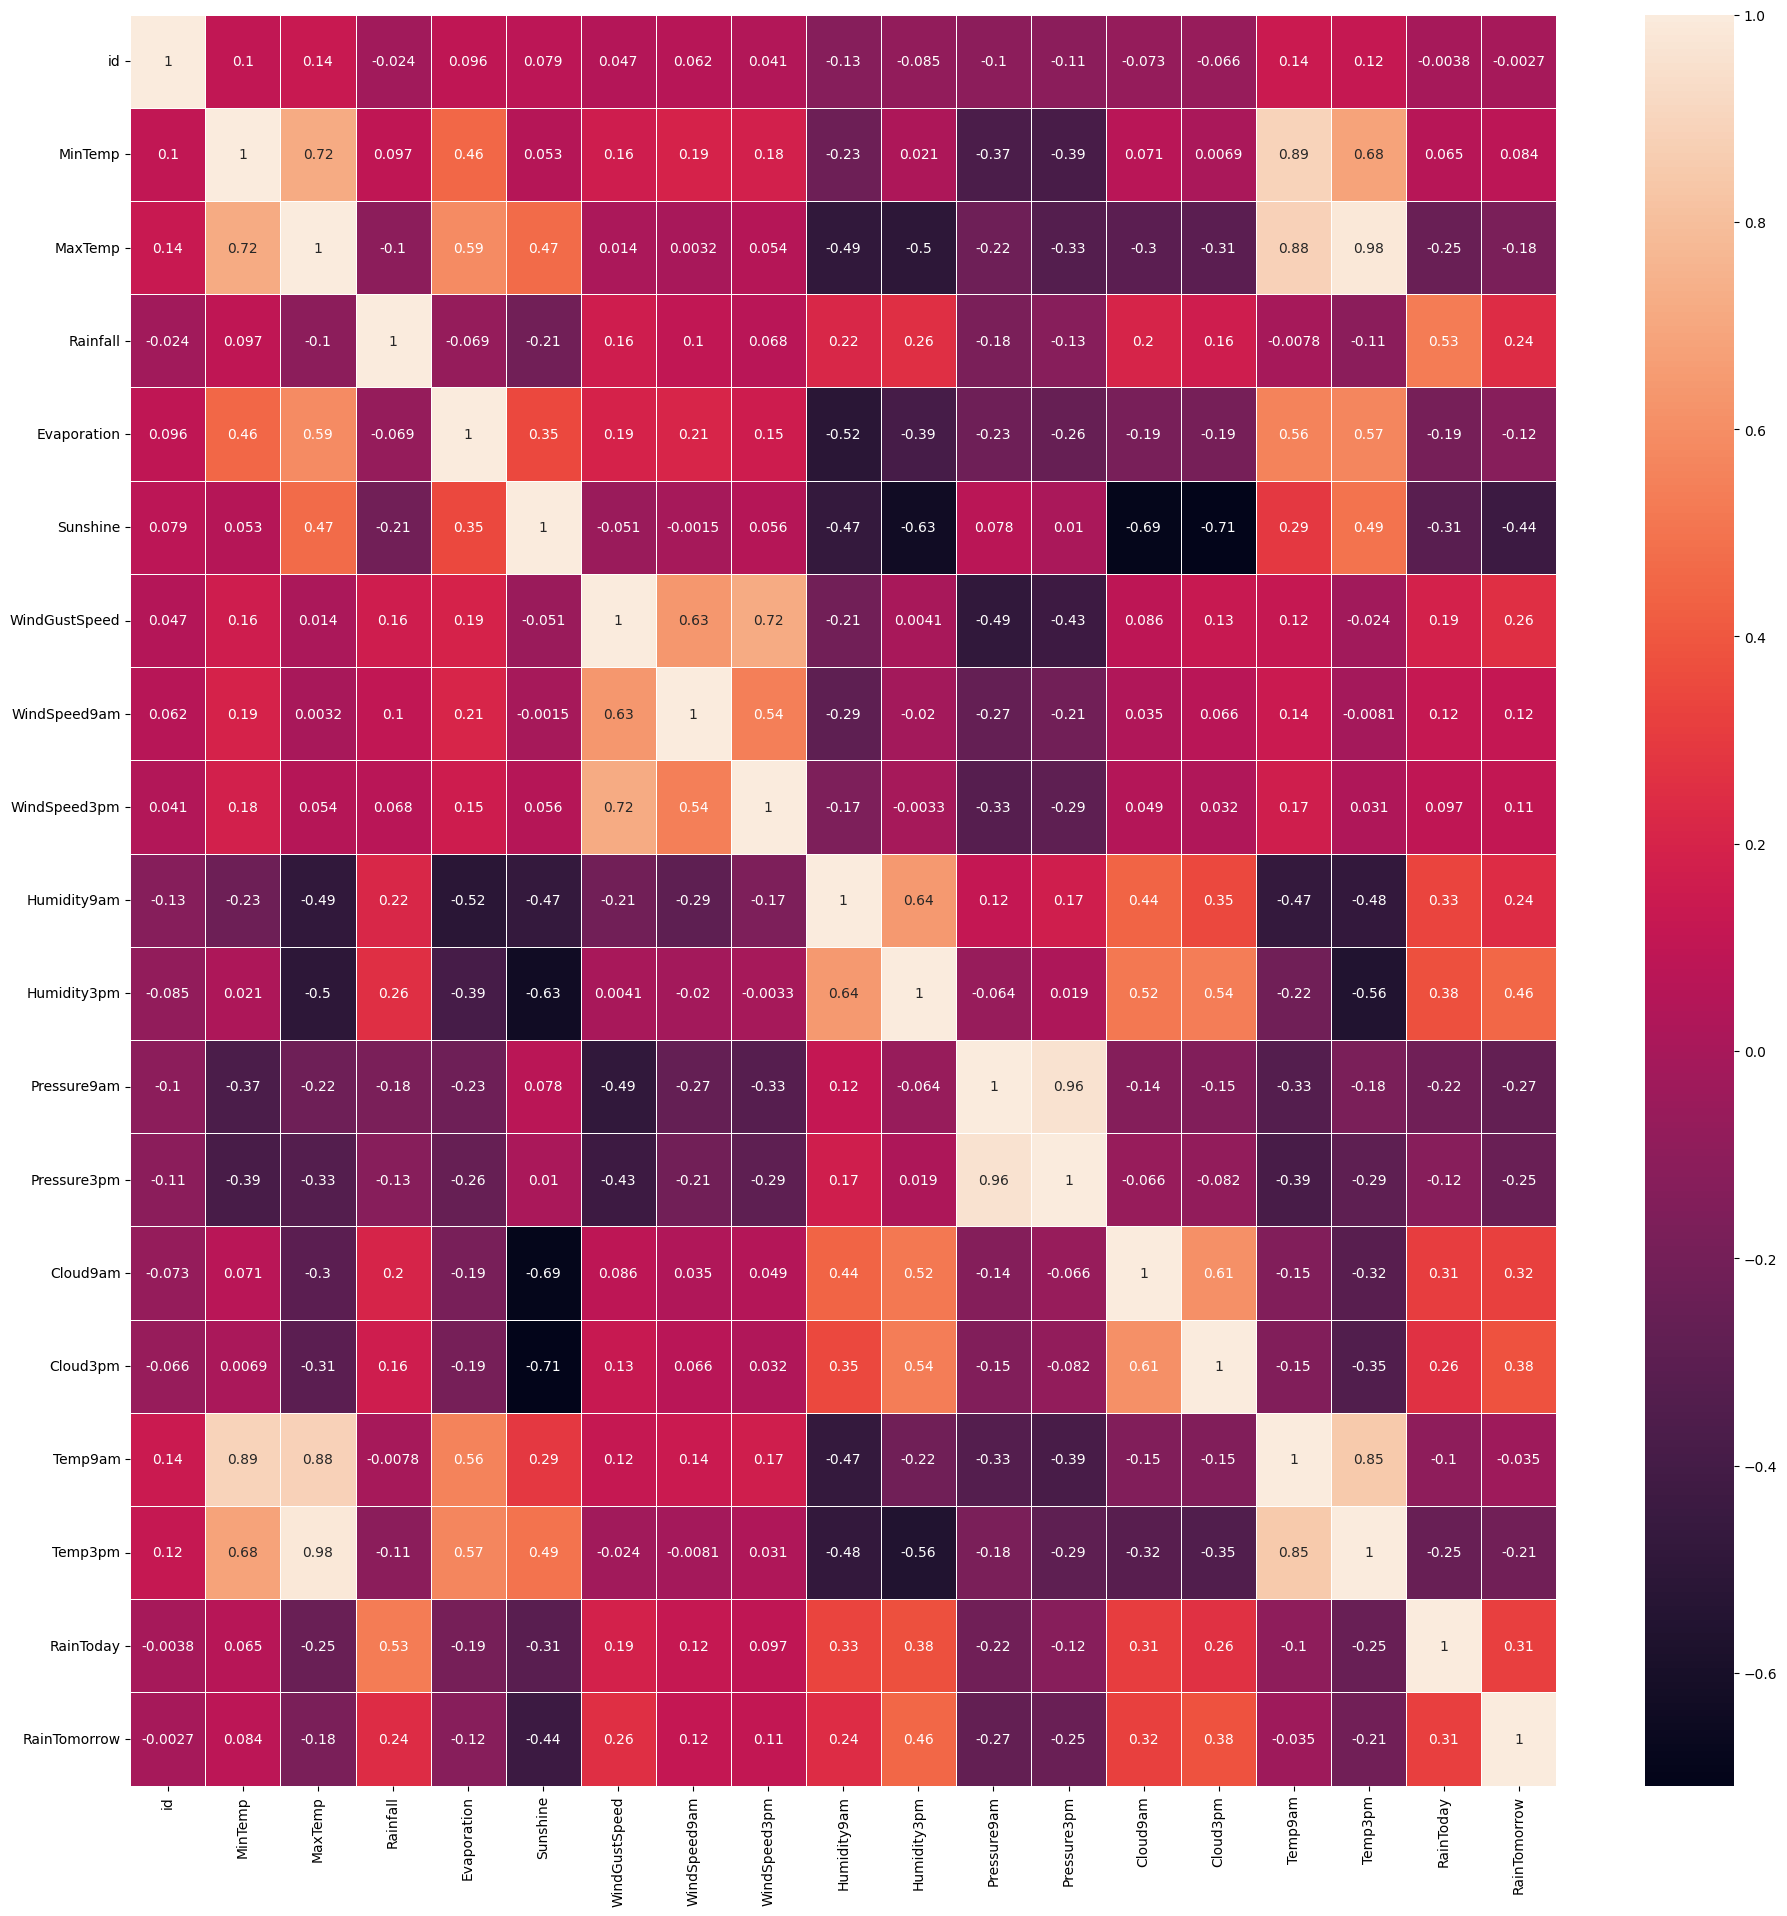

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = train_val.corr()
fig, ax = plt.subplots(figsize=(23,23))         # Sample figsize in inches
sn.heatmap(corr_matrix, annot=True,linewidths=.5, ax=ax)

train_val.drop(['id','Date','WindGustDir','WindDir9am','WindDir3pm'], axis=1, inplace=True)

3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2

# handle numeric features
numeric_features = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# handle categorical features
categorical_features = ['Location']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OneHotEncoder(handle_unknown='ignore', sparse = False))])
train_val.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             48423 non-null  int64  
 1   Date           48423 non-null  object 
 2   Location       48423 non-null  object 
 3   MinTemp        48263 non-null  float64
 4   MaxTemp        48322 non-null  float64
 5   Rainfall       48423 non-null  float64
 6   Evaporation    28039 non-null  float64
 7   Sunshine       25426 non-null  float64
 8   WindGustDir    45302 non-null  object 
 9   WindGustSpeed  45330 non-null  float64
 10  WindDir9am     44602 non-null  object 
 11  WindDir3pm     47095 non-null  object 
 12  WindSpeed9am   48066 non-null  float64
 13  WindSpeed3pm   47566 non-null  float64
 14  Humidity9am    47865 non-null  float64
 15  Humidity3pm    47164 non-null  float64
 16  Pressure9am    43643 non-null  float64
 17  Pressure3pm    43634 non-null  float64
 18  Cloud9

3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

In [12]:
# ο κώδικας φαίνεται στο 3β μετά το σχόλιο # handle numeric features

3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη

In [13]:
# ο κώδικας φαίνεται στο 3β

3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.`



In [10]:
X = train_val[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]
yy = train_val[['RainTomorrow']]
y = yy.to_numpy().flatten()


3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [11]:
from sklearn.model_selection import train_test_split

RAND_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RAND_STATE)

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


1. Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

classifier = GaussianNB()
# Set the Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

# Fit the pipeline
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
print(f'Model score: {model.score(X_test, y_test)}')

from sklearn.metrics import classification_report
# compute the classification report
print(classification_report(y_test, y_pred))
agnb = f1_score(y_test, y_pred)
agnb

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model score: 0.6566393611895092
              precision    recall  f1-score   support

         0.0       0.89      0.63      0.74     11184
         1.0       0.38      0.74      0.50      3343

    accuracy                           0.66     14527
   macro avg       0.63      0.69      0.62     14527
weighted avg       0.77      0.66      0.68     14527



0.49959871589085075

In [18]:
from sklearn.metrics import accuracy_score
anb = f1_score(y_test, y_pred)
anb

0.49959871589085075

2. KNeighborsClassifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
# Define the classifier

classifier = KNeighborsClassifier()
# Set the Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

# Fit the pipeline
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(f'Model score: {model.score(X_test, y_test)}')

from sklearn.metrics import classification_report
# compute the classification report
print(classification_report(y_test, y_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model score: 0.8314861981138569
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89     11184
         1.0       0.68      0.51      0.58      3343

    accuracy                           0.83     14527
   macro avg       0.77      0.72      0.74     14527
weighted avg       0.82      0.83      0.82     14527



In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
akn = f1_score(y_test, y_pred)
akn

0.5806783144912642

 3. LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
# Set the Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

# Fit the pipeline
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print('Model score: {model.score(X_test, y_test)}')

from sklearn.metrics import classification_report
# compute the classification report
print(classification_report(y_test, y_pred))
alr = f1_score(y_test, y_pred)
alr

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model score: {model.score(X_test, y_test)}
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     11184
         1.0       0.75      0.54      0.63      3343

    accuracy                           0.85     14527
   macro avg       0.81      0.74      0.77     14527
weighted avg       0.84      0.85      0.84     14527



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6274305555555556

4. MLP με ένα κρυφό επίπεδο

In [22]:
import sklearn.neural_network as skl_nn
classifier = skl_nn.MLPClassifier()
# Set the Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

# Fit the pipeline
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print('Model score: {model.score(X_test, y_test)}')

from sklearn.metrics import classification_report
# compute the classification report
print(classification_report(y_test, y_pred))
amlp = f1_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model score: {model.score(X_test, y_test)}
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90     11184
         1.0       0.69      0.61      0.65      3343

    accuracy                           0.85     14527
   macro avg       0.79      0.77      0.78     14527
weighted avg       0.84      0.85      0.85     14527



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


5. SVC

In [23]:
from sklearn.svm import SVC
classifier = SVC()
# Set the Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

# Fit the pipeline
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(f'Model score: {model.score(X_test, y_test)}')

from sklearn.metrics import classification_report
# compute the classification report
print(classification_report(y_test, y_pred))

#asvc = accuracy_score(y_test, y_pred)
asvc = f1_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model score: 0.8597783437736628
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     11184
         1.0       0.79      0.53      0.63      3343

    accuracy                           0.86     14527
   macro avg       0.83      0.74      0.77     14527
weighted avg       0.85      0.86      0.85     14527



6. Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
# Set the Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

# Fit the pipeline
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print('Model score: {model.score(X_test, y_test)}')

from sklearn.metrics import classification_report
# compute the classification report
print(classification_report(y_test, y_pred))
adt = f1_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model score: {model.score(X_test, y_test)}
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86     11184
         1.0       0.54      0.55      0.54      3343

    accuracy                           0.79     14527
   macro avg       0.70      0.70      0.70     14527
weighted avg       0.79      0.79      0.79     14527



7. Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
# Set the Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

# Fit the pipeline
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print('Model score: {model.score(X_test, y_test)}')

from sklearn.metrics import classification_report
# compute the classification report
print(classification_report(y_test, y_pred))
arf = f1_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model score: {model.score(X_test, y_test)}
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     11184
         1.0       0.77      0.53      0.63      3343

    accuracy                           0.86     14527
   macro avg       0.82      0.74      0.77     14527
weighted avg       0.85      0.86      0.85     14527



 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [26]:
# έγινε παραπάνω και στους 7 ταξινομητές ακριβώς κάτω από το σχόλιο # Fit the pipeline

4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [27]:
# έγινε παραπάνω και στους 7 ταξινομητές ακριβώς κάτω από το σχόλιο # Predict


4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [30]:
import pandas as pd
import numpy as np

# Assuming values and labels are defined
values = np.array([anb, akn, amlp, adt, arf, asvc, alr])
labels = ['Naive Bayes', 'KNeighborsClassifier', 'MLP with one hidden layer', 'Decision Tree', 'Random Forest', 'SVC', 'LogisticRegression']

# Create a DataFrame
table_df = pd.DataFrame({'Label': labels, 'F1 Value': values})

# Display the table
print(table_df)


                       Label  F1 Value
0                Naive Bayes  0.499599
1       KNeighborsClassifier  0.580678
2  MLP with one hidden layer  0.650238
3              Decision Tree  0.544358
4              Random Forest  0.632082
5                        SVC  0.633831
6         LogisticRegression  0.627431


4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


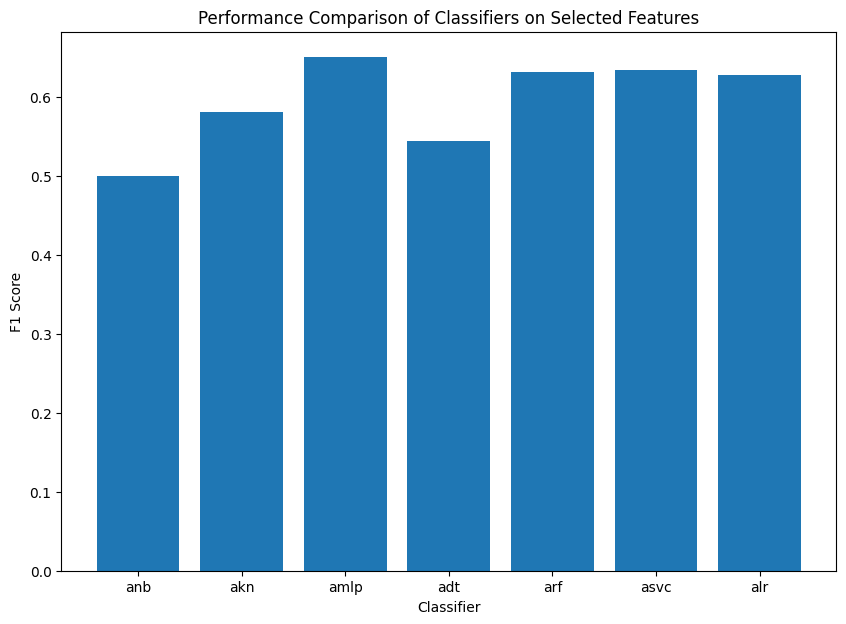

In [29]:
from matplotlib import pyplot as plt
import numpy as np

# Assuming anb, akn, amlp, adt, arf, asvc, alr are numerical values
# If not, replace them with actual numerical values
values = np.array([anb, akn, amlp, adt, arf, asvc, alr])
labels = ['anb', 'akn', 'amlp', 'adt', 'arf', 'asvc', 'alr']

# Creating a bar chart
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(labels, values)

# Adding labels and title
ax.set_xlabel('Classifier')
ax.set_ylabel('F1 Score')
ax.set_title('Performance Comparison of Classifiers on Selected Features')

# Show plot
plt.show()


Βλέπουμε ότι το καλύτερο μοντέλο είναι το MLP αφού έχει το μεγαλύτερο F1 Score

### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το [test set](https://drive.google.com/file/d/1bcmuoeRVY0y5ZuY6nZcmzy8_5fOFR4Oa/view?usp=drive_link).


In [31]:
import sklearn.neural_network as skl_nn
classifier = skl_nn.MLPClassifier()
# Set the Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

# Fit the pipeline
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(test)

y_pred = y_pred.astype(int)
result=pd.DataFrame(data={"id":range(1, len(y_pred) + 1), "RainTomorrow":y_pred})


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
y_pred = y_pred.astype(int)
result=pd.DataFrame(data={"id":range(1, len(y_pred) + 1), "RainTomorrow":y_pred})
result.info()

result.to_csv('submission.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9699 entries, 0 to 9698
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id            9699 non-null   int64
 1   RainTomorrow  9699 non-null   int64
dtypes: int64(2)
memory usage: 151.7 KB


In [33]:
result

,id,RainTomorrow
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0
...,...,...
9694,9695,0
9695,9696,0
9696,9697,0
9697,9698,0


5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [34]:
# έγινε παραπάνω

### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων.

*Naive* Bayes

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
import numpy as np
search_space =[
                {'classifier': [GaussianNB()],
    'classifier__priors': [None],
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],
                }
              ]



model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])


grid = GridSearchCV(model, search_space, cv=5, verbose=0)



In [43]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning
best_model = grid.fit(X, y)


In [44]:
best_param = grid.best_params_
print(best_param)

# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier': GaussianNB(var_smoothing=1e-06), 'classifier__priors': None, 'classifier__var_smoothing': 1e-06}
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                        

In [45]:
preds = best_model.predict(X_test)
from sklearn.metrics import accuracy_score
anb = f1_score(y_test, preds)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.90      0.63      0.74     11184
         1.0       0.38      0.75      0.50      3343

    accuracy                           0.66     14527
   macro avg       0.64      0.69      0.62     14527
weighted avg       0.78      0.66      0.68     14527



KNeighborsClassifier

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
search_space =[
                {'classifier': [KNeighborsClassifier()],
                 'classifier__n_neighbors': [1, 3, 5],
                 'classifier__metric':['euclidean','manhattan']
                },

              ]

classifier = KNeighborsClassifier()

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

grid = GridSearchCV(model, search_space, cv=5, verbose=0)



In [47]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning
best_model = grid.fit(X, y)


In [48]:
best_param = grid.best_params_
print(best_param)

# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier': KNeighborsClassifier(metric='euclidean', n_neighbors=3), 'classifier__metric': 'euclidean', 'classifier__n_neighbors': 3}
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',

In [49]:
preds = best_model.predict(X_test)
from sklearn.metrics import accuracy_score
akn = f1_score(y_test, preds)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94     11184
         1.0       0.84      0.70      0.76      3343

    accuracy                           0.90     14527
   macro avg       0.87      0.83      0.85     14527
weighted avg       0.90      0.90      0.90     14527



LogisticRegression


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
search_space =[
                {'classifier': [LogisticRegression()],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10)}

              ]

classifier = LogisticRegression()

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

grid = GridSearchCV(model, search_space, cv=5, verbose=0)


In [66]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning
best_model = grid.fit(X, y)
best_param = grid.best_params_
print(best_param)

# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier': LogisticRegression(), 'classifier__C': 1.0, 'classifier__penalty': 'l2'}
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                

In [67]:
preds = best_model.predict(X_test)
from sklearn.metrics import accuracy_score
alr = f1_score(y_test, preds)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     11184
         1.0       0.75      0.54      0.63      3343

    accuracy                           0.85     14527
   macro avg       0.81      0.74      0.77     14527
weighted avg       0.84      0.85      0.84     14527



MLP με ένα κρυφό επίπεδο


In [61]:
from sklearn.model_selection import GridSearchCV
import sklearn.neural_network as skl_nn

import numpy as np
search_space =[
               {'classifier': [skl_nn.MLPClassifier()],
                 'classifier__hidden_layer_sizes': [4],
                 'classifier__alpha': [1e-3],
                'classifier__max_iter': [600]
                }
              ]

classifier = skl_nn.MLPClassifier()

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

grid = GridSearchCV(model, search_space, cv=5, verbose=0)


In [62]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning
best_model = grid.fit(X, y)
best_param = grid.best_params_
print(best_param)

# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier': MLPClassifier(alpha=0.001, hidden_layer_sizes=4, max_iter=600), 'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': 4, 'classifier__max_iter': 600}
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                            

In [63]:

preds = best_model.predict(X_test)
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
amlp = f1_score(y_test, preds)
amlp
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     11184
         1.0       0.75      0.58      0.65      3343

    accuracy                           0.86     14527
   macro avg       0.82      0.76      0.78     14527
weighted avg       0.85      0.86      0.85     14527



SVC

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import numpy as np
search_space =[
                {'classifier': [SVC()],
                 'classifier__max_iter': [500],
                 'classifier__kernel': ['rbf','linear'],
                 'classifier__gamma': [0.1,0.01,1e-3],
                 'classifier__C': [1, 10]
                }
              ]

classifier = SVC()

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

grid = GridSearchCV(model, search_space, cv=5, verbose=0)



In [51]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning
best_model = grid.fit(X, y)
best_param = grid.best_params_
print(best_param)

# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier': SVC(C=1, gamma=0.01, kernel='linear', max_iter=500), 'classifier__C': 1, 'classifier__gamma': 0.01, 'classifier__kernel': 'linear', 'classifier__max_iter': 500}
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                         

In [52]:
preds = best_model.predict(X_test)
from sklearn.metrics import accuracy_score
asvc = f1_score(y_test, preds)
asvc
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.80      0.25      0.38     11184
         1.0       0.24      0.79      0.37      3343

    accuracy                           0.38     14527
   macro avg       0.52      0.52      0.37     14527
weighted avg       0.67      0.38      0.38     14527



Decission Tree

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

import numpy as np
search_space =[

               {'classifier': [DecisionTreeClassifier()],
                'classifier__min_samples_leaf': range(9, 11, 1),
                 'classifier__max_depth': range(1,3),
                }
              ]
classifier = DecisionTreeClassifier()

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])
grid = GridSearchCV(model, search_space, cv=5, verbose=0)



In [54]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning
best_model = grid.fit(X, y)
best_param = grid.best_params_
print(best_param)

# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier': DecisionTreeClassifier(max_depth=2, min_samples_leaf=9), 'classifier__max_depth': 2, 'classifier__min_samples_leaf': 9}
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
 

In [55]:
preds = best_model.predict(X_test)
from sklearn.metrics import accuracy_score
adt = f1_score(y_test, preds)
adt
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.83      0.98      0.89     11184
         1.0       0.80      0.31      0.45      3343

    accuracy                           0.82     14527
   macro avg       0.81      0.64      0.67     14527
weighted avg       0.82      0.82      0.79     14527



Random Forest

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

search_space =[
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': range(550, 580, 10),
                 'classifier__max_depth': range(7,9,1),
                },

              ]

classifier = RandomForestClassifier()

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

grid = GridSearchCV(model, search_space, cv=5, verbose=0)


In [57]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning
best_model = grid.fit(X, y)
best_param = grid.best_params_
print(best_param)

# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier': RandomForestClassifier(max_depth=8, n_estimators=560), 'classifier__max_depth': 8, 'classifier__n_estimators': 560}
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
     

In [58]:
preds = best_model.predict(X_test)
from sklearn.metrics import accuracy_score
arf = f1_score(y_test, preds)
arf
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     11184
         1.0       0.83      0.45      0.59      3343

    accuracy                           0.85     14527
   macro avg       0.84      0.71      0.75     14527
weighted avg       0.85      0.85      0.84     14527



6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [59]:
# έγινε στα παραπάνω ερωτήματα


6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [68]:
import pandas as pd
import numpy as np

# Assuming values and labels are defined
values = np.array([anb, akn, amlp, adt, arf, asvc, alr])
labels = ['Naive Bayes', 'KNeighborsClassifier', 'MLP with one hidden layer', 'Decision Tree', 'Random Forest', 'SVC', 'LogisticRegression']

# Create a DataFrame
table_df = pd.DataFrame({'Label': labels, 'F1 Value': values})

# Display the table
print(table_df)

                       Label  F1 Value
0                Naive Bayes  0.503093
1       KNeighborsClassifier  0.760710
2  MLP with one hidden layer  0.654852
3              Decision Tree  0.445736
4              Random Forest  0.587209
5                        SVC  0.369120
6         LogisticRegression  0.627955


6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


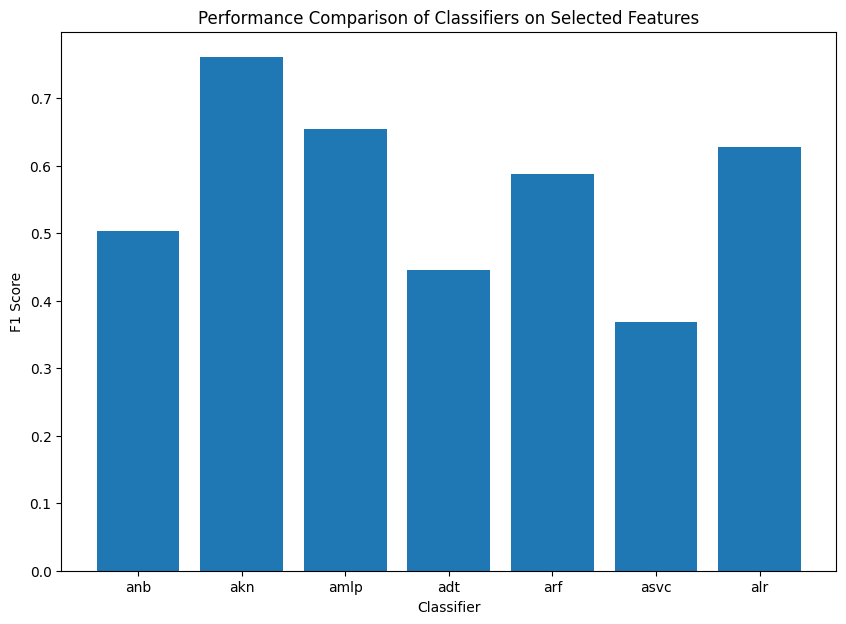

In [69]:
from matplotlib import pyplot as plt
import numpy as np

# Assuming anb, akn, amlp, adt, arf, asvc, alr are numerical values
# If not, replace them with actual numerical values
values = np.array([anb, akn, amlp, adt, arf, asvc, alr])
labels = ['anb', 'akn', 'amlp', 'adt', 'arf', 'asvc', 'alr']

# Creating a bar chart
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(labels, values)

# Adding labels and title
ax.set_xlabel('Classifier')
ax.set_ylabel('F1 Score')
ax.set_title('Performance Comparison of Classifiers on Selected Features')

# Show plot
plt.show()

### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [71]:
classifier = skl_nn.MLPClassifier(hidden_layer_sizes=(3), alpha=0.001, max_iter=600)

# Set the Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

# Fit the pipeline
model.fit(X_train, y_train)

y_pred = model.predict(test)
y_pred = preds.astype(int)
results=pd.DataFrame(data={"id":range(1, len(y_pred) + 1),"RainTomorrow":y_pred})
results.info()
results.to_csv('submission2.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14527 entries, 0 to 14526
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id            14527 non-null  int64
 1   RainTomorrow  14527 non-null  int64
dtypes: int64(2)
memory usage: 227.1 KB


7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [ ]:
# έγινε στο παραπάνω ερώτημα